
# Equity Derivatives

---
Youssef BULAHIA, January 2024.
---

---
---

The goal of this notebook is to price some equity derivatives : Call options and Barrier options.

In order to complete this task, we will do the following steps :
- Implement the Black Scholes model
- Implement the Heston model
- Compute the sensitivies of the prices
- Use Monte Carlo method to compute the prices

In [1]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from random import gauss, uniform, randint
from math import exp, sqrt, log
import scipy as sp
from scipy.stats import norm

## The Black Scholes model

Under the black scholes model, the price of a call option is given by :
$$ Call^{BS}(t,S_t) = S_t \exp(-q(T-t))N(d_1) - K \exp(-r(T-t))N(d_0) $$
Where :
$$ d_1 = \frac{1}{\sigma \sqrt{T-t}} \times [\ln(\frac{S_t}{K}) + (r-q+\frac{\sigma²}{2})(T-t)]$$
$$ d_0 = d_1 - \sigma\sqrt{T-t} $$

The Delta of the call option :
$$ \Delta(t,S_t) = \frac{\partial Call^{BS}}{\partial S_t} = \exp(-q * (T-t)) N(d_1)$$

The Gamma of tha call option :
$$ \Gamma(t,S_t) = \frac{\partial²Call^{BS}}{\partial S_t²} = \frac{\exp(-q * (T-t))}{S_t\sigma\sqrt{T-t}} \phi(d_1)$$

The Vega of tha call option : 
$$ Vega(t,S_t) = \exp(-q * (T-t)) S_t\sqrt{T-t} \phi(d_1) $$

With :
- with $N$ is the cumulative density function of a $N(01)$.
- $\phi$ is the likelihood of a $N(01)$.

In [2]:
def CallBS(St, t, Strike, Maturity, r, q, sigma):
    d_1 = (1/(sigma*((Maturity-t)**0.5))) * (log(St/Strike) + (r - q + (sigma * sigma / 2)) * (Maturity - t))
    d_0 = d_1 - sigma * (Maturity - t)**0.5
    CallPrice = St * exp(-q * (Maturity - t)) * norm.cdf(d_1) - Strike * exp(-r * (Maturity - t)) * norm.cdf(d_0)
    return CallPrice

In [3]:
# Call caracteristics
Strike = 100
Maturity = 0.5 # in years -> 0.5 is equivalent to ~6 months

# Model parameters
r = 0.00 # interest rate
q = 0.00 # dividend rate
sigma = 0.2 # volatlity

t = 0
St = 100
    
print('Price of the call option using BS model : ', CallBS(St,t,Strike,Maturity,r,q,sigma))

Price of the call option using BS model :  5.6371977797016655


In [4]:
# Using BS formula
def CallDeltaBS(St, t, Strike, Maturity, r, q, sigma):
    d_1 = (1/(sigma*((Maturity-t)**0.5))) * (log(St/Strike) + (r - q + (sigma * sigma / 2)) * (Maturity - t))
    delta = exp(-q*(Maturity-t)) * norm.cdf(d_1)
    return delta

# Using Finite Difference method
def CallDeltaFDBS(St, t, Strike, Maturity, r, q, sigma):
    delta = CallBS(St + 0.01, t, Strike, Maturity, r, q, sigma) - CallBS(St - 0.01, t, Strike, Maturity, r, q, sigma)
    return delta / 0.02

In [5]:
def CallGammaBS(St, t, Strike, Maturity, r, q, sigma):
    d_1 = (1/(sigma*((Maturity-t)**0.5))) * (log(St/Strike) + (r - q + (sigma * sigma / 2)) * (Maturity - t))
    gamma = exp(-q*(Maturity-t)) * norm.pdf(d_1) / (St * sigma * ((Maturity-t)**0.5))
    return gamma

In [6]:
def CallVegaBS(St, t, Strike, Maturity, r, q, sigma):
    d_1 = (1/(sigma*((Maturity-t)**0.5))) * (log(St/Strike) + (r - q + (sigma * sigma / 2)) * (Maturity - t))
    vega = exp(-q*(Maturity-t)) * St * ((Maturity-t)**0.5) * norm.pdf(d_1)
    return vega

In [7]:
# Call caracteristics
Strike = 100
Maturity = 0.5 # in years -> 0.5 is equivalent to ~6 months

# Model parameters
r = 0.00 # interest rate
q = 0.00 # dividend rate
sigma = 0.2 # volatlity

t = 0
St = 100

print('Delta using BS formula                :', CallDeltaBS(St,t,Strike,Maturity,r,q,sigma))
print('Delta using finite difference method  :', CallDeltaFDBS(St,t,Strike,Maturity,r,q,sigma))
print('Gamma using BS formula                :', CallGammaBS(St,t,Strike,Maturity,r,q,sigma))
print('Vega using BS formula                 :', CallVegaBS(St,t,Strike,Maturity,r,q,sigma))

Delta using BS formula                : 0.5281859888985083
Delta using finite difference method  : 0.5281859818637713
Gamma using BS formula                : 0.02813904356065048
Vega using BS formula                 : 28.13904356065048


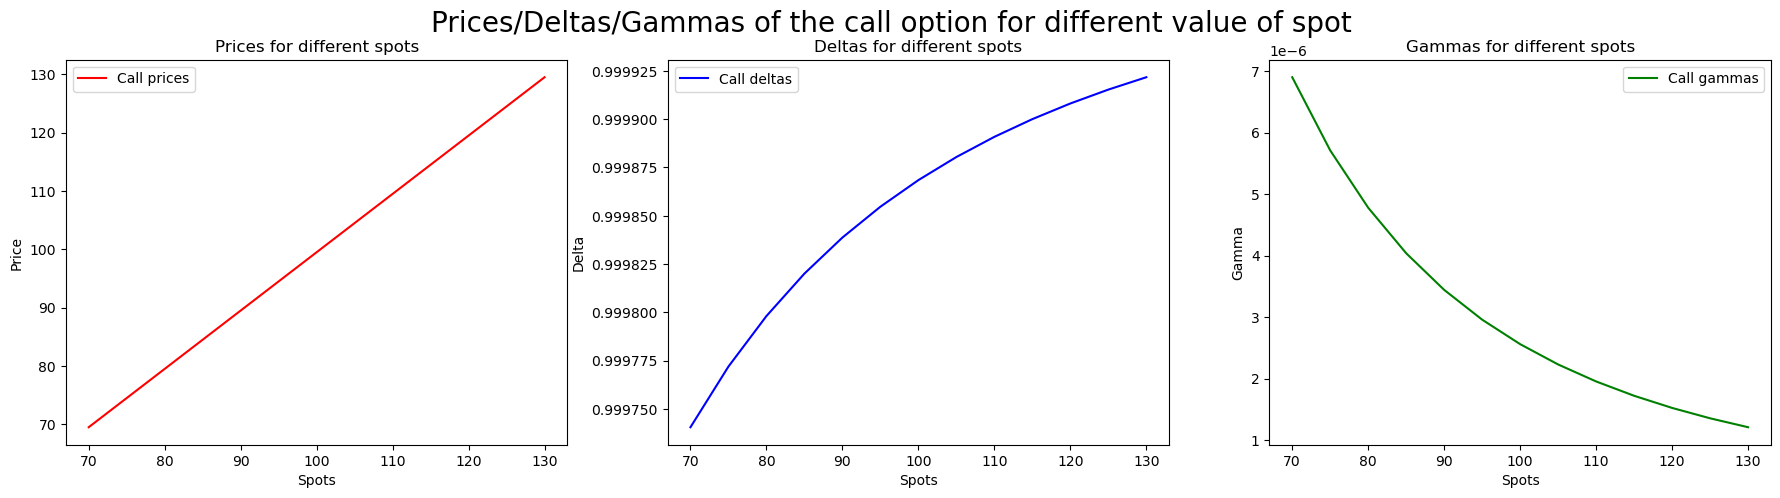

In [8]:
#graphs of Price, Delta and Gamma for different value of St

# Call caracteristics
Strike = 100
Maturity = 0.5 # in years -> 0.5 is equivalent to ~6 months

# Model parameters
r = 0.00 # interest rate
q = 0.00 # dividend rate
sigma = 0.2 # volatlity

t = 0

Spots = [70, 75 , 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130]

callPriceGraph = [CallBS(St, t, Maturity, Strike, r, q, sigma) for St in Spots]
callDeltaGraph = [CallDeltaBS(St, t, Maturity, Strike, r, q, sigma) for St in Spots]
callGammaGraph = [CallGammaBS(St, t, Maturity, Strike, r, q, sigma) for St in Spots]

fig, axs = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Prices/Deltas/Gammas of the call option for different value of spot', fontsize=20)

axs[0].plot(Spots, callPriceGraph, color = 'r', label = 'Call prices')
axs[0].set_xlabel("Spots")
axs[0].set_ylabel("Price")
axs[0].set_title("Prices for different spots")
axs[0].legend()

axs[1].plot(Spots, callDeltaGraph, color = 'b', label = 'Call deltas')
axs[1].set_xlabel("Spots")
axs[1].set_ylabel("Delta")
axs[1].set_title("Deltas for different spots")
axs[1].legend()

axs[2].plot(Spots, callGammaGraph, color = 'g', label = 'Call gammas')
axs[2].set_xlabel("Spots")
axs[2].set_ylabel("Gamma")
axs[2].set_title("Gammas for different spots")
axs[2].legend()

Now we will compute the call option price using the Monte Carlo method.

In [9]:
# Call price using Monte Carlo method

def CallBSbyMC(St, t, Strike, Maturity, r, q, sigma, numberOfSim):
    #initialization
    dt = Maturity - t
    
    Ws = np.random.normal(0, 1, numberOfSim)
    S_Ts = St * np.exp((r - q - 0.5 * sigma**2) * dt + sigma * sqrt(dt) * Ws)
    
    Payoffs = exp(-r*dt) * np.maximum(S_Ts - Strike, 0)
    
    price = np.mean(Payoffs) #to average over all Payoffs
    stdOfX = np.std(Payoffs) #to get the std over all Payoffs
    CI = [price - 1.96*stdOfX / sqrt(numberOfSim), price + 1.96*stdOfX / sqrt(numberOfSim)]
    return price, CI

In [21]:
# Call caracteristics
Strike = 100
Maturity = 0.5 # in years -> 0.5 is equivalent to ~6 months

# Model parameters
r = 0.00 # interest rate
q = 0.00 # dividend rate
sigma = 0.2 # volatlity

t = 0
St = 100

numberOfSim = 2000000

print('The call price using MC method :', CallBSbyMC(St,t,Strike,Maturity,r,q,sigma,numberOfSim)[0])
print('The standard error              :', CallBSbyMC(St,t,Strike,Maturity,r,q,sigma,numberOfSim)[1])

The call price using MC method : 5.62406955316404
The standard error              : [5.627452506288094, 5.65235037209572]


## The Heston model

In the Heston model, the volatility is not considered constant as in the Black-Scholes model but is a stochastic process. The joint dynamics of the equity share and its variance, under the **historical probability** $\mathbb{P}$ is given by :
$$ dS_t = (\mu - q) S_t dt + \sqrt{V_t} S_t dB^{S}_{t}$$
$$ dV_t = \kappa(\theta - V_t)dt + \sigma \sqrt{V_t} dB^{V}_{t}$$
Where $B^{S}$ and $B^{V}$ are standard brownian motions under $\mathbb{P}$, correlated such as $<B^{S}, B^{V}>_t = \rho t$

Remark : under the "risk-neutral probability" $\mathbb{Q}$, only the parameter $\mu$ is changed (to be equal to the risk free rate $r$).

The Euler scheme of the above SDE is :
$$ S_{t_{i+1}} - S_{t_{i}} = (\mu - q) S_{t_{i}} (t_{i+1} - t_{i}) + \sqrt{V_{t_{i}}} S_{t_{i}} (B^{S}_{t_{i+1}} - B^{S}_{t_{i}}) $$
$$ V_{t_{i+1}} - V_{t_{i}} = \kappa(\theta - V_t) (t_{i+1} - t_{i}) + \sigma \sqrt{V_{t_{i}}}  (B^{V}_{t_{i+1}} - B^{V}_{t_{i}}) $$

In [11]:
def generatePathsWithHeston(dates, S0, V0, mu, q, sigV, rho, kappa, theta, numberOfPaths):
    
    outputS = []
    outputV = []
    
    for i in range(numberOfPaths):
        S = [S0]
        V = [V0]
        
        for j in range(len(dates)-1):
            
            #GENERATE S / V  at time t_{i+1} conditionnaly to time t_i
            dt = dates[j+1] - dates[j]
            
            #Generate one stop of the bi-dimensional BM
            dBs = gauss(0, sqrt(dt)) 
            dBv = rho * dBs + (1 - rho*rho)**0.5 * gauss(0,sqrt(dt))
            
            #Update S and V
            S_temp = S[-1] + (r - q) * S[-1] * dt + sqrt(abs(V[-1])) * S[-1] * dBs
            V_temp = V[-1] + kappa * (theta - V[-1]) * dt + sigV * sqrt(abs(V[-1])) * dBv 
            
            S.append(S_temp)
            V.append(V_temp)

        outputS.append(S)
        outputV.append(V)
        
    return [outputS, outputV]

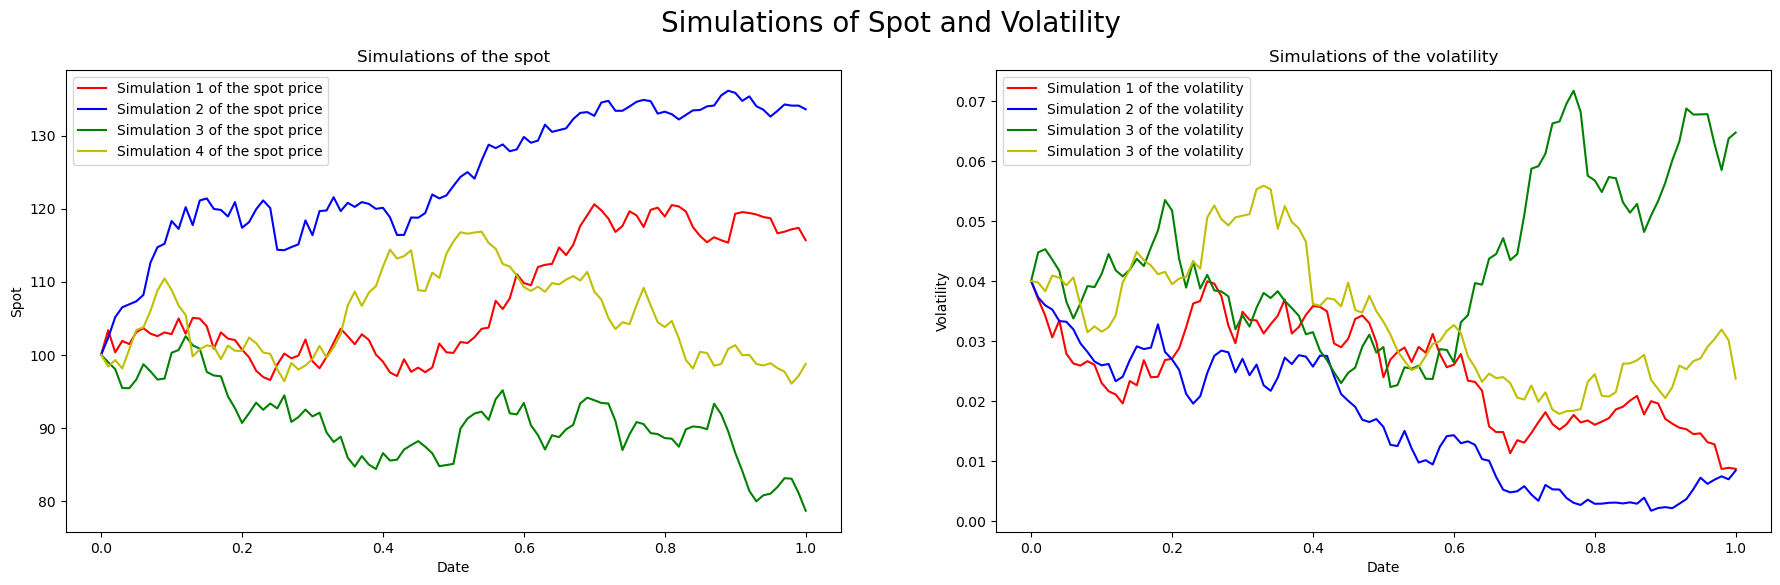

In [12]:
dates = [0.01*i for i in range(101)]
S0 = 100
V0 = 0.04 # so sqrt(V0)=0.2
r = 0.0
q = 0.0
sigV = 0.15
rho = -0.5
kappa = 0.3
theta = 0.04 
numberOfPaths = 1000
output = generatePathsWithHeston(dates, S0, V0, r, q, sigV, rho, kappa, theta, numberOfPaths)

fig, axs = plt.subplots(1, 2, figsize=(22, 6))
fig.suptitle('Simulations of Spot and Volatility', fontsize=20)

axs[0].plot(dates,output[0][0], color = 'r', label = 'Simulation 1 of the spot price')
axs[0].plot(dates,output[0][1], color = 'b', label = 'Simulation 2 of the spot price')
axs[0].plot(dates,output[0][2], color = 'g', label = 'Simulation 3 of the spot price')
axs[0].plot(dates,output[0][3], color = 'y', label = 'Simulation 4 of the spot price')

axs[0].set_xlabel("Date")
axs[0].set_ylabel("Spot")
axs[0].set_title("Simulations of the spot")
axs[0].legend()

axs[1].plot(dates,output[1][0], color = 'r', label = 'Simulation 1 of the volatility')
axs[1].plot(dates,output[1][1], color = 'b', label = 'Simulation 2 of the volatility')
axs[1].plot(dates,output[1][2], color = 'g', label = 'Simulation 3 of the volatility')
axs[1].plot(dates,output[1][3], color = 'y', label = 'Simulation 3 of the volatility')
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Volatility")
axs[1].set_title("Simulations of the volatility")
axs[1].legend()

Now we will implement a function performing the pricing of a European Call option under the Heston model by Monte-Carlo methods and returning the estimation of both the price and the standard error.

In [13]:
def HestonCallPriceMC(t, St, Vt, T, K, r, q, kappa, theta, sigV, rho, numberOfSteps, numberOfSim):
    
    dates = [t + ((T-t)/numberOfSteps) * i for i in range(numberOfSteps+1)]
    paths = generatePathsWithHeston(dates, St, Vt, r, q, sigV, rho, kappa, theta, numberOfSim)[0]
    STs = np.array(paths)[:,-1]
    payoffs = exp(-r * (T-t)) * np.maximum(STs - K, 0)
    
    price = np.mean(payoffs)
    stdOfPrice = np.std(payoffs)
    
    CI = [price - 1.96 * stdOfPrice / sqrt(numberOfSim), price + 1.96 * stdOfPrice / sqrt(numberOfSim)]
    return price, CI

In [20]:
t = 0
St = 100
Vt = 0.04
T = 1 
K = 100
kappa = 0.15
sigV = 0.15
theta = 0.04
corr = -0.5
r = 0
q = 0
numberOfSteps = 100
numberOfSim = 10000

callPriceByMC = HestonCallPriceMC(t, St, Vt, T, K, r, q, kappa, theta, sigV, corr, numberOfSteps,numberOfSim)

print('The call price using MC method :', callPriceByMC[0])
print('The standard error              :', callPriceByMC[1])

The call price using MC method : 7.92012603969138
The standard error              : [7.690357337124223, 8.149894742258537]


Now we will upgrade the Monte-Carlo pricer using the antithetic variable variance reduction technique.

In [18]:
def HestonCallPriceMC_Antithetic(t,St,Vt,T,K,r,q,kappa, theta, sigV, corr, numberOfSteps,numberOfSim):

    #initialization
    dt = (T - t) / numberOfSteps
     
    runningAv = 0
    runningVar = 0
    
    n = numberOfSim//2
    
    #for loop
    for i in range(n):
        S = [St]
        Vs = [Vt]

        #DRAW ST CONDITIONNALY TO St
        S_p = St
        S_m = St
        V = Vt
        for j in range(numberOfSteps):
            dB_S = gauss(0, sqrt(dt)) 
            dB_V = rho * dB_S + (1 - rho*rho)**0.5 * gauss(0,sqrt(dt))
            S_p = S[-1] + (r - q) * S[-1] * dt + sqrt(abs(Vs[-1])) * S[-1] * dB_S
            S_m = S[-1] + (r - q) * S[-1] * dt - sqrt(abs(Vs[-1])) * S[-1] * dB_S
            V = Vs[-1] + kappa * (theta - Vs[-1]) * dt + sigV * sqrt(abs(Vs[-1])) * dB_V
            S.append(S_p)
            Vs.append(V)
        #END OF DRAW ST CONDITIONNALY TO St
        
        X = 0.5 * ( max(S_p-K,0) + max(S_m-K,0) )
        runningAv += X
        runningVar += X**2
    
    runningAv *= exp(-r*(T-t))
    runningAv /= n
    
    runningVar *= exp(-2*r*(T-t))
    runningVar /= n
    runningVar -= runningAv**2
    runningVar = sqrt(runningVar/n)
    
    CI = [runningAv - 1.96 * runningVar, runningAv + 1.96 * runningVar]
    
    return runningAv, CI

In [19]:
numberOfSim = 10000
numberOfSimAnti = 5000
callPriceByMC = HestonCallPriceMC(t,St,Vt,T,K,r,q,kappa, theta, sigV, corr, numberOfSteps,numberOfSim)
callPriceByMCAnti = HestonCallPriceMC_Antithetic(t,St,Vt,T,K,r,q,kappa, theta, sigV, corr, numberOfSteps,numberOfSimAnti)
print('Heston MC            :', 'the price is', callPriceByMC[0], '; the standard error is', callPriceByMC[1])
print('Heston antithetic MC :', 'the price is', callPriceByMCAnti[0], '; the standard error is', callPriceByMCAnti[1])

Heston MC            : the price is 7.748528038746324 ; the standard error is [7.520605469407572, 7.9764506080850754]
Heston antithetic MC : the price is 7.570610938040818 ; the standard error is [7.13165436769808, 8.009567508383556]


Now we will implement a control variate approach. A good candidate for the control variate is :
$$ \exp(-rT) (X_T - K)_{+} - Call^{BS} (0, X_0, T, K, r, q, \sqrt{V_0})$$
Where the procces $X_t$ is defined as :
$$ dX_t = (r - q)X_t dt + \sqrt{V_0} X_t dB^{S}_{t}$$
$$ X_0 = S_0$$

In [28]:
def HestonCallPriceMC_Control(t, St, Vt, T, K, r, q, kappa, theta, sigV, rho, numberOfSteps, numberOfSim):

    #initialization    
    dt = (T - t) / numberOfSteps
    runningAv = 0
    runningVar = 0        
    
    for i in range(numberOfSim):
        

        #DRAW ST CONDITIONNALY TO St
        S = St
        S_c = St
        V = Vt
        for j in range(numberOfSteps):
            dB_S = gauss(0, sqrt(dt))
            dB_V = rho * dB_S + (1 - rho*rho)**0.5 * gauss(0,sqrt(dt))
            S = S + (r - q) * S * dt + sqrt(abs(V)) * S * dB_S
            S_c = S_c + (r - q) * S_c * dt + sqrt(abs(Vt)) * S_c * dB_S
            V = V + kappa * (theta - V) * dt + sigV * sqrt(abs(V)) * dB_V
        #END OF DRAW ST CONDITIONNALY TO St
        
        X = max(S-K, 0) + exp(-r * (T-t)) * max(S_c - K, 0) - CallBS(St,t, K, T, r,q,sqrt(Vt))
        runningAv += X
        runningVar += X**2
    
    runningAv *= exp(-r*(T - t))
    runningAv += CallBS(St,t, K, T, r,q,sqrt(Vt))
    runningAv /= numberOfSim
    
    runningVar *= exp(-2*r*dt*numberOfSteps)
    runningVar /= numberOfSim
    runningVar -= runningAv**2
    runningVar = sqrt(runningVar/numberOfSim)
    
    CI = [runningAv - 1.96 * runningVar, runningAv + 1.96 * runningVar]
    
    return runningAv, CI   

In [31]:
numberOfSim = 10000
numberOfSimAnti = 5000

callPriceByMC = HestonCallPriceMC(t,St,Vt,T,K,r,q,kappa, theta, sigV, corr, numberOfSteps,numberOfSim)
callPriceByMCAnti = HestonCallPriceMC_Antithetic(t,St,Vt,T,K,r,q,kappa, theta, sigV, corr, numberOfSteps,numberOfSimAnti)
callPriceByMCControl = HestonCallPriceMC_Control(t,St,Vt,T,K,r,q,kappa, theta, sigV, corr, numberOfSteps,numberOfSim)

print('Heston MC                 :', 'the price is', callPriceByMC[0], '; the standard error is', callPriceByMC[1])
print('Heston antithetic MC      :', 'the price is', callPriceByMCAnti[0], '; the standard error is', callPriceByMCAnti[1])
print('Heston Control variate MC :', 'the price is', callPriceByMCControl[0], '; the standard error is', callPriceByMCControl[1])

Heston MC                 : the price is 7.919712965645911 ; the standard error is [7.692364939861037, 8.147060991430784]
Heston antithetic MC      : the price is 7.501058618933416 ; the standard error is [7.049521763516477, 7.952595474350355]
Heston Control variate MC : the price is 7.534568637231365 ; the standard error is [7.059957841776837, 8.009179432685892]


## Barrier Option : Up-and-In Put

 The payoff of an *Up-and-In Put* is given by :
 $$ (K - S_T)_{+} \mathbb{1}_{\max\limits_{t \in [0,T]} (S_t) > B}$$
At the maturity of the option T, the buyer has access to the payoff (of Put type) only if the maximum of the equity value observed during the life of the option is higher than the "barrier" level B.

We will compute the price of the Up-and-In Put option using a Monte-Carlo method and then using the closed formula :
$$ \left(\frac{S_0}{B}\right)^{\alpha - 2} Put^{BS} (0, S_0, T, \frac{S_0²K}{B²}, r, q, \sigma) $$
Where :
$$ \alpha = 1 - 2 \frac{r-q}{\sigma²}$$

In [75]:
def BS_UIP_PriceByMC(t, St, T, B, K, r, q, sigma, numOfSim, numOfDisc):
    
    #initialization
    dt = (T - t)/numOfDisc
    VecX = []
    Maxis = []
    
    #for loop
    for i in range(numOfSim):
        
        Bs = np.random.normal(0, 1, numOfDisc)
        Ss = np.exp( (r - q - 0.5*sigma**2)*dt + sigma * sqrt(dt) * Bs)
        Ss = St * np.cumprod(Ss)
        maxi = np.max(Ss)
        S = Ss[-1]

        if maxi > B:
            Xi = exp(-r * (T - t) ) * max(K - S, 0)
        else:
            Xi = 0
        
        VecX.append(Xi)

    price = np.mean(VecX) #to average over all Xs
    stdOfX = np.std(VecX) #to get the std over all Xs
    CI = [price - 1.96*stdOfX / sqrt(numberOfSim), price + 1.96*stdOfX / sqrt(numberOfSim)]
    return price, CI

In [81]:
t, T = 0, 1
St, K, B = 100, 100, 105
r, q, sigma = 0.01, 0.0, 0.2
numOfSim, numOfDisc = 10000, 10000

price1 = BS_UIP_PriceByMC(t ,St ,T , B, K, r, q, sigma, numOfSim, numOfDisc)
print('The Up-and-In Put price using BS and MC method is :', price1[0], '; the standard error is :', price1[1])

The Up-and-In Put price using MC method is : 3.79928877326481 ; the standard error is : [3.654703963032817, 3.9438735834968033]


In [92]:
t, T = 0, 1
St, K, B = 100, 100, 105
r, q, sigma = 0.01, 0.0, 0.2
numOfSim, numOfDisc = 10000, 10000

alpha = 1.0 - 2.0 * (r-q) / (sigma**2)
Kprime = ((St/B)**2)*K

PutPrice = CallBS(St, t, Kprime, T, r, q, sigma) - St + Kprime * exp(-r*(T-t))
price2 = ((St/B)**(alpha-2.0)) * PutPrice

print('The Up-and-In Put price using the closed formula :', price2)

The Up-and-In Put price using the closed formula : 3.7901835445063896


Now we will use the Heston model to simulate the underlying asset.

In [90]:
def Heston_UIC_PriceByMC(t, St, Vt, T, B, K, r, q, sigV, rho, kappa, theta, numOfSim, numOfDisc):
    
    dt = (T - t) / numOfDisc
    VecX = []

    for i in range(numOfSim):
        S = St
        V = Vt
        maxi = St
        for j in range(numOfDisc):
            dB_S = gauss(0, sqrt(dt))
            dB_V = rho * dB_S + (1 - rho*rho)**0.5 * gauss(0,sqrt(dt))
            S = S + (r - q) * S * dt + sqrt(abs(V)) * S * dB_S
            V = V + kappa * (theta - V) * dt + sigV * sqrt(abs(V)) * dB_V
            maxi = max(maxi,S)
        
        if maxi > B:
            Xi = exp(-r * (T - t) ) * max(K - S, 0)
        else:
            Xi = 0
        
        VecX.append(Xi)
         
    price = np.mean(VecX) #to average over all Xs
    stdOfX = np.std(VecX) #to get the std over all Xs
    CI = [price - 1.96*stdOfX / sqrt(numberOfSim), price + 1.96*stdOfX / sqrt(numberOfSim)]
    
    return price, CI   

In [91]:
t, T = 0, 1
St, K, B = 100, 100, 105
r, q, sigV = 0.01, 0.0, 0.2
numOfSim, numOfDisc = 10000, 10000
Vt, rho, kappa, theta = 0.04, -0.5, 0.3, 0.04

price3 = Heston_UIC_PriceByMC(t, St, Vt, T, B, K, r, q, sigV, rho, kappa, theta, numOfSim, numOfDisc)
         
print('The Up-and-In Put price using Heston and MC method is :', price3[0], '; the standard error is :', price3[1])

The Up-and-In Put price using Heston and MC method is : 3.520478619761926 ; the standard error is : [3.3642837171499553, 3.6766735223738967]


Now, we will compare the sensitivities $\Delta$ and $Vega$ between the 2 models

In [96]:
t, T = 0, 1
St, K, B = 100, 100, 105
r, q, sigma = 0.01, 0.0, 0.2
numOfSim, numOfDisc = 10000, 10000
Vt, rho, kappa, theta = 0.04, -0.5, 0.3, 0.04

delta_BS = (BS_UIP_PriceByMC(t, St + 0.01, T, B, K, r, q, sigma, numOfSim, numOfDisc)[0] - BS_UIP_PriceByMC(t, St  - 0.01 ,T , B, K, r, q, sigma, numOfSim, numOfDisc)[0]) / 0.02
delta_HS = (Heston_UIC_PriceByMC(t, St + 0.01, Vt, T, B, K, r, q, sigma, rho, kappa, theta, numOfSim, numOfDisc)[0] - Heston_UIC_PriceByMC(t, St - 0.01, Vt, T, B, K, r, q, sigma, rho, kappa, theta, numOfSim, numOfDisc)[0]) / 0.02

vega_BS = (BS_UIP_PriceByMC(t, St, T , B, K, r, q, sigma + 0.01, numOfSim, numOfDisc)[0] - BS_UIP_PriceByMC(t ,St,T , B, K, r, q, sigma - 0.01, numOfSim, numOfDisc)[0]) / 0.02
vega_HS = (Heston_UIC_PriceByMC(t, St, Vt, T, B, K, r, q, sigma + 0.01, rho, kappa, theta, numOfSim, numOfDisc)[0] - Heston_UIC_PriceByMC(t, St, Vt, T, B, K, r, q, sigma - 0.01, rho, kappa, theta, numOfSim, numOfDisc)[0]) / 0.02

print('--------------------------------------------------------------------')
print('The delta using BS model and MC method    is  :', delta_BS)
print('The delta using Heston model and MC method is :', delta_HS)
print('--------------------------------------------------------------------')
print('The vega using BS model and MC method    is  :', vega_BS)
print('The vega using Heston model and MC method is :', vega_HS)

--------------------------------------------------------------------
The delta using BS model and MC method    is  : 1.9481859225862763
The delta using Heston model and MC method is : 0.7674229295571156
--------------------------------------------------------------------
The vega using BS model and MC method    is  : 39.814027463588154
The vega using Heston model and MC method is : -2.091336792013676
